In [0]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from numpy import random
from astropy.visualization import make_lupton_rgb

In [0]:
img=cv2.imread('portfolio-4.jpg',0)

In [0]:
print(img.shape)

(489, 800)


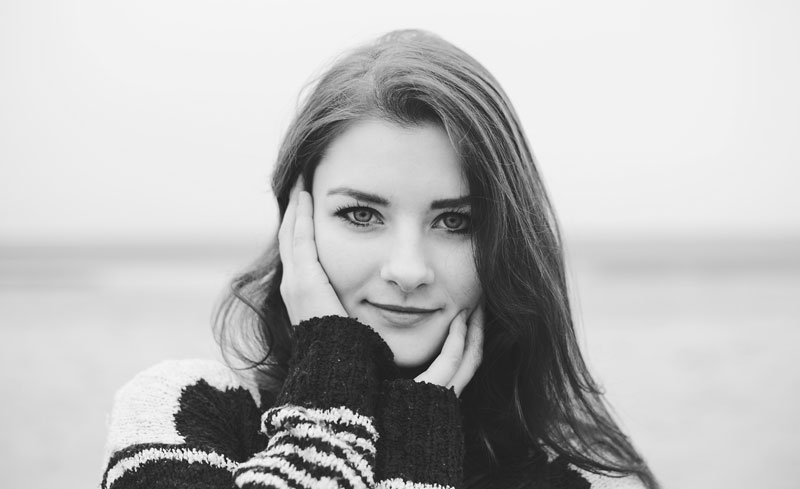

In [0]:
cv2_imshow(img)

Previous Dimensions:
 (489, 800)
Resized Dimensions:
  (342, 560)




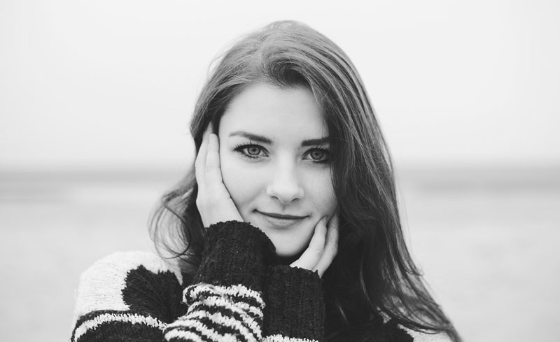

In [0]:
scale_percent = 70 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
resized = cv2.resize(img, dim)
print('Previous Dimensions:\n',img.shape)
print('Resized Dimensions:\n ',resized.shape)
print('\n') 
cv2_imshow(resized)

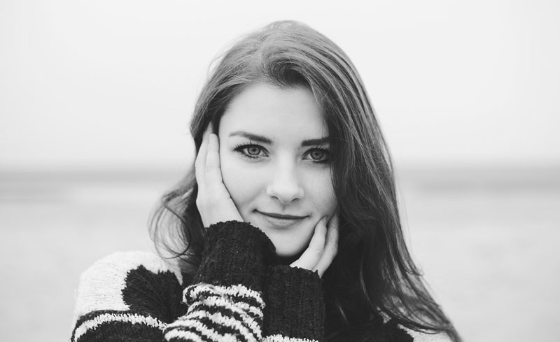

In [0]:
# Load the data...
im = resized
data = np.array(im, dtype=float)
#print(im[:5,:5],data[:5,:5])
cv2_imshow(data)

Original Image


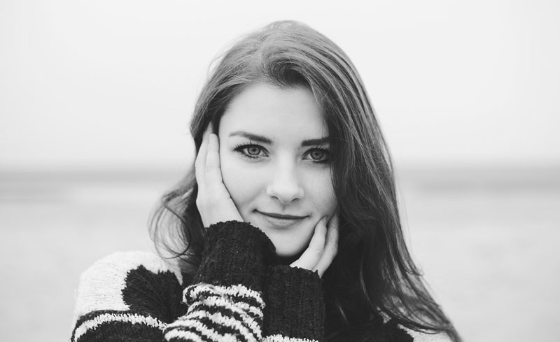

highpass_3x3


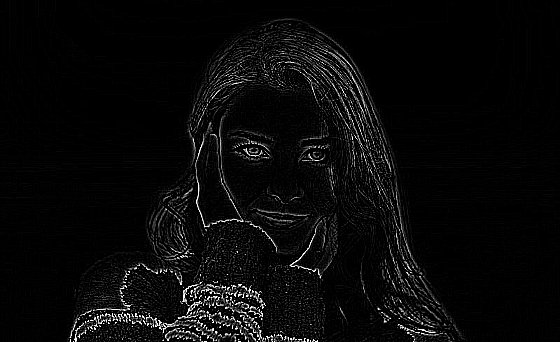

Highpass 5X5


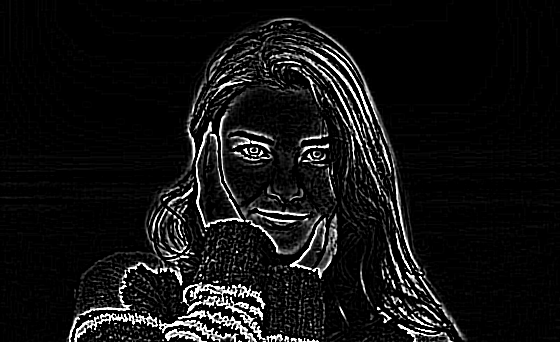

Rnandom Highpass


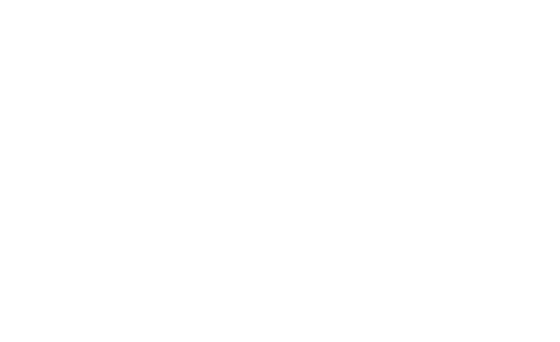

gaussian highpass


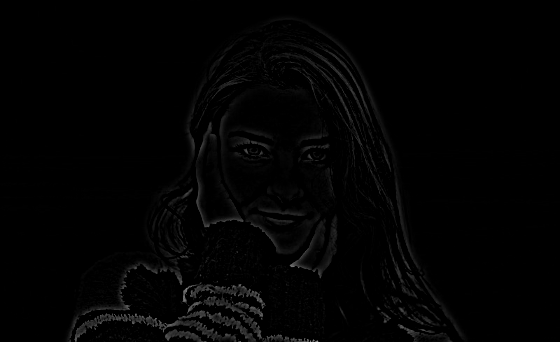

Gaussian Lowpass


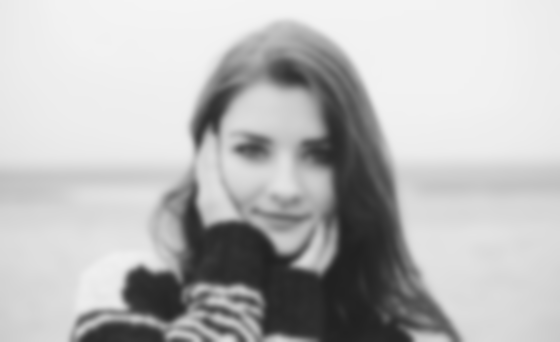

In [0]:
# A very simple and very narrow highpass filter
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])
        
highpass_3x3 = ndimage.convolve(data, kernel)
print('Original Image')
cv2_imshow(data)
print('highpass_3x3')
cv2_imshow(highpass_3x3)

# A slightly "wider", but sill very simple highpass filter 
kernel = np.array([[-1, -1, -1, -1, -1],
                   [-1,  1,  2,  1, -1],
                   [-1,  2,  4,  2, -1],
                   [-1,  1,  2,  1, -1],
                   [-1, -1, -1, -1, -1]])
kernel_new = np.array( [[1, 1, 1, 1, 1  ],
                        [1, 1, 1, 1, 1],
                        [1,  1,  2,  1, 1],
                        [1,  1,  1,  1, 1],
                        [1, 1, 1, 1, 1]])
print('Highpass 5X5')
highpass_5x5 = ndimage.convolve(data, kernel)
cv2_imshow(highpass_5x5)
print('Rnandom Highpass')
highpass_5x5_new = ndimage.convolve(data, kernel_new)
cv2_imshow(highpass_5x5_new)
#plot(highpass_5x5, 'Simple 5x5 Highpass')
#print(highpass_5x5[:10,:10])

# Another way of making a highpass filter is to simply subtract a lowpass
# filtered image from the original. Here, we'll use a simple gaussian filter
# to "blur" (i.e. a lowpass filter) the original.
lowpass = ndimage.gaussian_filter(data, 3)
gauss_highpass = data - lowpass
print('gaussian highpass')
cv2_imshow(gauss_highpass)
print('Gaussian Lowpass')
cv2_imshow(lowpass)
#plot(gauss_highpass, r'Gaussian Highpass, $\sigma = 3 pixels$')



In [0]:
Z = random.random((300,300,3))  *255
Z.shape

(300, 300, 3)

In [0]:
# B,G,R
Z[:,:50,0]= 255
Z[:,:50,1]= 0
Z[:,:50,2]= 0
Z[:,50:90,0]=0
Z[:,50:90,1]=255
Z[:,50:90,2]=0


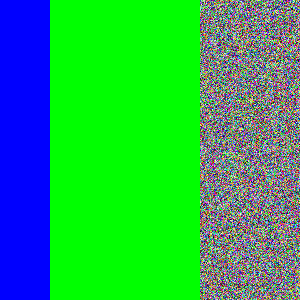

In [151]:
cv2_imshow(Z)

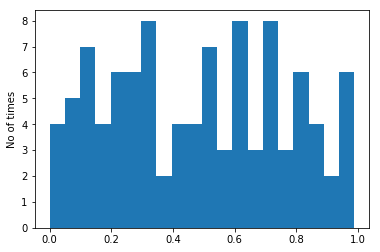

In [155]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
x = np.random.rand(100,1)
plt.hist(x, bins=20)
plt.ylabel('No of times')
plt.show()